<a href="https://colab.research.google.com/github/andresvc21/Random_Practice_ML/blob/main/Homework_M2_Hyperparameter_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Homework

1. Choose 4 hyperparameters we have learned about in class
2. Create lists of the different options of hyperparameters
3. Randomly sample from those lists and train a Keras model on Fashion - MNIST
4. Display the different loss and accuracy curves using matplotlib
** train at least 10 different models

In [ ]:
lr = (0.1, 0.01)
bs = (1,127)
opt = ['adam'...]


# Explore Data


In [ ]:
#Import Data

from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt


(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#Exploe data
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


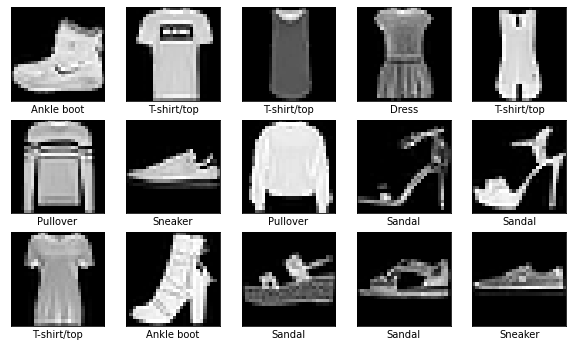

In [ ]:
# From https://medium.com/analytics-vidhya/applying-ann-digit-and-fashion-mnist-13accfc44660 we know the data has next follow names

col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']



#Visualizing the images
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel(col_names[y_train[i]])
plt.show()